# JSON 데이터와 데이터프레임

In [30]:
import json
import pandas as pd

## 1.JSON to DataFrame

In [26]:
# 데이터 load
with open('data/target.json', 'r') as json_file:
    load_data = json.load(json_file)

print(load_data)

{'employee': [{'id': 123, 'name': 'Queen', 'department': 'HR', 'skills': ['communication', 'teamwork']}, {'id': 113, 'name': 'Elice', 'department': 'Developer', 'skills': ['teamwork', 'innovation']}, {'id': 213, 'name': 'Rabbit', 'department': 'Developer', 'skills': ['leadership', 'teamwork']}, {'id': 311, 'name': 'Hatter', 'department': 'Marketer', 'skills': ['communication', 'decisiveness']}, {'id': 313, 'name': 'Cheshire', 'department': 'HR', 'skills': ['responsibility', 'leadership']}]}


In [27]:
print(type(load_data))

#json데이터 dumps로 확인하기
print(json.dumps(load_data, indent=4))

<class 'dict'>
{
    "employee": [
        {
            "id": 123,
            "name": "Queen",
            "department": "HR",
            "skills": [
                "communication",
                "teamwork"
            ]
        },
        {
            "id": 113,
            "name": "Elice",
            "department": "Developer",
            "skills": [
                "teamwork",
                "innovation"
            ]
        },
        {
            "id": 213,
            "name": "Rabbit",
            "department": "Developer",
            "skills": [
                "leadership",
                "teamwork"
            ]
        },
        {
            "id": 311,
            "name": "Hatter",
            "department": "Marketer",
            "skills": [
                "communication",
                "decisiveness"
            ]
        },
        {
            "id": 313,
            "name": "Cheshire",
            "department": "HR",
            "skills": [
            

In [28]:
load_df1 = pd.DataFrame(load_data)
load_data

{'employee': [{'id': 123,
   'name': 'Queen',
   'department': 'HR',
   'skills': ['communication', 'teamwork']},
  {'id': 113,
   'name': 'Elice',
   'department': 'Developer',
   'skills': ['teamwork', 'innovation']},
  {'id': 213,
   'name': 'Rabbit',
   'department': 'Developer',
   'skills': ['leadership', 'teamwork']},
  {'id': 311,
   'name': 'Hatter',
   'department': 'Marketer',
   'skills': ['communication', 'decisiveness']},
  {'id': 313,
   'name': 'Cheshire',
   'department': 'HR',
   'skills': ['responsibility', 'leadership']}]}

In [29]:
load_df2 = pd.read_json('data/target.json')
load_df2

,employee
0,"{'id': 123, 'name': 'Queen', 'department': 'HR..."
1,"{'id': 113, 'name': 'Elice', 'department': 'De..."
2,"{'id': 213, 'name': 'Rabbit', 'department': 'D..."
3,"{'id': 311, 'name': 'Hatter', 'department': 'M..."
4,"{'id': 313, 'name': 'Cheshire', 'department': ..."


In [31]:
#json_normalize: json으로 구성된 리스트의 중첩 구조를 flat 하여 df로 변환

pd.json_normalize(load_df2['employee'])

,id,name,department,skills
0,123,Queen,HR,"[communication, teamwork]"
1,113,Elice,Developer,"[teamwork, innovation]"
2,213,Rabbit,Developer,"[leadership, teamwork]"
3,311,Hatter,Marketer,"[communication, decisiveness]"
4,313,Cheshire,HR,"[responsibility, leadership]"


### 불러온 데이터프레임으로 데이터 분석하기
- employee에서 skill 빈도수를 도출하는 간단한 데이터 분석을 진행

In [44]:
df= pd.DataFrame(load_data["employee"])
df

,id,name,department,skills
0,123,Queen,HR,"[communication, teamwork]"
1,113,Elice,Developer,"[teamwork, innovation]"
2,213,Rabbit,Developer,"[leadership, teamwork]"
3,311,Hatter,Marketer,"[communication, decisiveness]"
4,313,Cheshire,HR,"[responsibility, leadership]"


In [ ]:
#df = pd.DataFrame(load_df2["employee"])
#df

,employee
0,"{'id': 123, 'name': 'Queen', 'department': 'HR..."
1,"{'id': 113, 'name': 'Elice', 'department': 'De..."
2,"{'id': 213, 'name': 'Rabbit', 'department': 'D..."
3,"{'id': 311, 'name': 'Hatter', 'department': 'M..."
4,"{'id': 313, 'name': 'Cheshire', 'department': ..."


- pandas explode 메소드 사용: 행 분리

In [47]:
# explode 확인을 위한 샘플 데이터 생성  
sample_df = pd.DataFrame({  
    'A': [1, 2, 3],  
    'B': [['X', 'Y'], ['X', 'Z'], ['W']],  
    'C': [['Apple', 'Banana'], ['Grape'], ['Cherry', 'Date']]  
})  

print("Original DataFrame:")  
print(sample_df)  

Original DataFrame:
   A       B                C
0  1  [X, Y]  [Apple, Banana]
1  2  [X, Z]          [Grape]
2  3     [W]   [Cherry, Date]


In [48]:
# B컬럼 기준 explode 실행
df_exploded_B = sample_df.explode('B')

print("\nDataFrame after explodig 'B' column: ")
print(df_exploded_B)


DataFrame after explodig 'B' column: 
   A  B                C
0  1  X  [Apple, Banana]
0  1  Y  [Apple, Banana]
1  2  X          [Grape]
1  2  Z          [Grape]
2  3  W   [Cherry, Date]


In [49]:
# C컬럼 기준 explode 실행
df_exploded_C = sample_df.explode('C')

print("\nDataFrame after explodig 'C' column: ")
print(df_exploded_C)


DataFrame after explodig 'C' column: 
   A       B       C
0  1  [X, Y]   Apple
0  1  [X, Y]  Banana
1  2  [X, Z]   Grape
2  3     [W]  Cherry
2  3     [W]    Date


- explode 메소드를 사용하여 skills 컬럼을 재구성

In [51]:
df_skills = df['skills'].explode()
df_skills

0     communication
0          teamwork
1          teamwork
1        innovation
2        leadership
2          teamwork
3     communication
3      decisiveness
4    responsibility
4        leadership
Name: skills, dtype: object

In [52]:
#각 기술의 빈도수 계산
skills_freq_df = df_skills.value_counts().reset_index()
skills_freq_df

,skills,count
0,teamwork,3
1,communication,2
2,leadership,2
3,innovation,1
4,decisiveness,1
5,responsibility,1


In [53]:
skills_freq_df.columns = ['Skill', 'Freq']
skills_freq_df

,Skill,Freq
0,teamwork,3
1,communication,2
2,leadership,2
3,innovation,1
4,decisiveness,1
5,responsibility,1


- 데이터 시각화

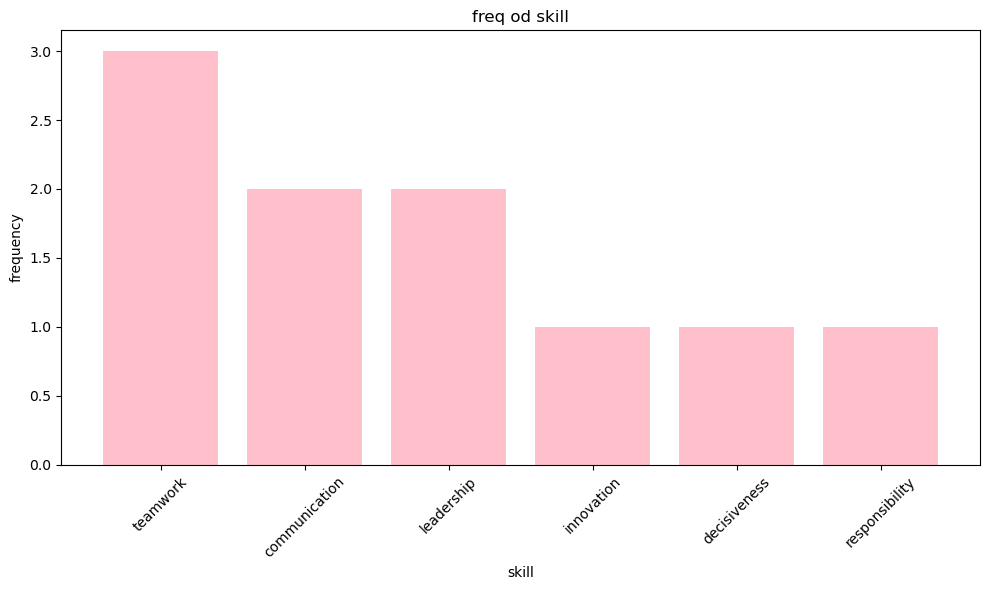

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.bar(skills_freq_df['Skill'], skills_freq_df['Freq'], color= 'pink')

plt.title('freq od skill')
plt.xlabel('skill'); plt.ylabel('frequency')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 2. DataFrame to JSON
Pandas 라이브러리에서 지원하는 to_json 함수를 사용하면 분석한 데이터프레임을 JSON으로 저장할 수 있음 단, Series 자료형은 JSON으로 저장할 수 없음

In [58]:
new_employee = [{
        "id" : 108, 
        "name" : "King", 
        "department" : "Developer", 
        "skills" : ["leadership", "communication"]
    },
    {
        "id" : 133, 
        "name" : "KIM", 
        "department" : "Marketer", 
        "skills" : ["teamwork", "decisiveness"]
    }]


new_df = pd.DataFrame(new_employee)
new_df

,id,name,department,skills
0,108,King,Developer,"[leadership, communication]"
1,133,KIM,Marketer,"[teamwork, decisiveness]"


In [59]:
df

,id,name,department,skills
0,123,Queen,HR,"[communication, teamwork]"
1,113,Elice,Developer,"[teamwork, innovation]"
2,213,Rabbit,Developer,"[leadership, teamwork]"
3,311,Hatter,Marketer,"[communication, decisiveness]"
4,313,Cheshire,HR,"[responsibility, leadership]"


In [60]:
df_concat = pd.concat([df, new_df], ignore_index=True)
df_concat

,id,name,department,skills
0,123,Queen,HR,"[communication, teamwork]"
1,113,Elice,Developer,"[teamwork, innovation]"
2,213,Rabbit,Developer,"[leadership, teamwork]"
3,311,Hatter,Marketer,"[communication, decisiveness]"
4,313,Cheshire,HR,"[responsibility, leadership]"
5,108,King,Developer,"[leadership, communication]"
6,133,KIM,Marketer,"[teamwork, decisiveness]"


In [61]:
df_concat.to_json("employee_data(records).json", orient='records')

In [64]:
with open('employee_data(records).json') as employee_data :
    load_data = json.load(employee_data)

print(json.dumps(load_data, indent=4))

[
    {
        "id": 123,
        "name": "Queen",
        "department": "HR",
        "skills": [
            "communication",
            "teamwork"
        ]
    },
    {
        "id": 113,
        "name": "Elice",
        "department": "Developer",
        "skills": [
            "teamwork",
            "innovation"
        ]
    },
    {
        "id": 213,
        "name": "Rabbit",
        "department": "Developer",
        "skills": [
            "leadership",
            "teamwork"
        ]
    },
    {
        "id": 311,
        "name": "Hatter",
        "department": "Marketer",
        "skills": [
            "communication",
            "decisiveness"
        ]
    },
    {
        "id": 313,
        "name": "Cheshire",
        "department": "HR",
        "skills": [
            "responsibility",
            "leadership"
        ]
    },
    {
        "id": 108,
        "name": "King",
        "department": "Developer",
        "skills": [
            "leadership",
       

### to_json의 orient 옵션
| orient 옵션 | 설명 |
|-------------|-------|
| split       | 데이터를 객체로 분리하여 저장합니다. 예를 들어, 컬럼 이름, 데이터, 인덱스가 별도의 키로 저장됩니다 |
| records     | 각 행을 별도의 JSON 객체로 변환합니다. 컬럼 이름을 키로 하고 각 행의 값들을 값으로 사용합니다 |
| index       | 인덱스를 키로 사용하고 각 행의 데이터를 값으로 사용합니다. |
| columns     | 컬럼을 키로 사용하고 각 컬럼의 데이터를 저장합니다. orient 옵션을 지정하지 않으면 columns가 기본(default)으로 설정됩니다 |
| values      | 데이터를 순수한 2D 배열로 변환합니다. |
| table       | 데이터를 추가 메타데이터와 함께 JSON 테이블 스키마 형식으로 변환합니다. |

In [ ]:
#split

df_concat.to_json("employee_data(split).json", orient='split')

with open('employee_data(split).json') as employee_data :
    load_data = json.load(employee_data)

print(json.dumps(load_data, indent=4))

{
    "columns": [
        "id",
        "name",
        "department",
        "skills"
    ],
    "index": [
        0,
        1,
        2,
        3,
        4,
        5,
        6
    ],
    "data": [
        [
            123,
            "Queen",
            "HR",
            [
                "communication",
                "teamwork"
            ]
        ],
        [
            113,
            "Elice",
            "Developer",
            [
                "teamwork",
                "innovation"
            ]
        ],
        [
            213,
            "Rabbit",
            "Developer",
            [
                "leadership",
                "teamwork"
            ]
        ],
        [
            311,
            "Hatter",
            "Marketer",
            [
                "communication",
                "decisiveness"
            ]
        ],
        [
            313,
            "Cheshire",
            "HR",
            [
                "responsibilit

In [66]:
#index

df_concat.to_json("employee_data(index).json", orient='index')

with open('employee_data(index).json') as employee_data :
    load_data = json.load(employee_data)

print(json.dumps(load_data, indent=4))

{
    "0": {
        "id": 123,
        "name": "Queen",
        "department": "HR",
        "skills": [
            "communication",
            "teamwork"
        ]
    },
    "1": {
        "id": 113,
        "name": "Elice",
        "department": "Developer",
        "skills": [
            "teamwork",
            "innovation"
        ]
    },
    "2": {
        "id": 213,
        "name": "Rabbit",
        "department": "Developer",
        "skills": [
            "leadership",
            "teamwork"
        ]
    },
    "3": {
        "id": 311,
        "name": "Hatter",
        "department": "Marketer",
        "skills": [
            "communication",
            "decisiveness"
        ]
    },
    "4": {
        "id": 313,
        "name": "Cheshire",
        "department": "HR",
        "skills": [
            "responsibility",
            "leadership"
        ]
    },
    "5": {
        "id": 108,
        "name": "King",
        "department": "Developer",
        "skills": [
   

In [67]:
#column
df_concat.to_json("employee_data(columns).json", orient='columns')

with open('employee_data(columns).json') as employee_data :
    load_data = json.load(employee_data)

print(json.dumps(load_data, indent=4))

{
    "id": {
        "0": 123,
        "1": 113,
        "2": 213,
        "3": 311,
        "4": 313,
        "5": 108,
        "6": 133
    },
    "name": {
        "0": "Queen",
        "1": "Elice",
        "2": "Rabbit",
        "3": "Hatter",
        "4": "Cheshire",
        "5": "King",
        "6": "KIM"
    },
    "department": {
        "0": "HR",
        "1": "Developer",
        "2": "Developer",
        "3": "Marketer",
        "4": "HR",
        "5": "Developer",
        "6": "Marketer"
    },
    "skills": {
        "0": [
            "communication",
            "teamwork"
        ],
        "1": [
            "teamwork",
            "innovation"
        ],
        "2": [
            "leadership",
            "teamwork"
        ],
        "3": [
            "communication",
            "decisiveness"
        ],
        "4": [
            "responsibility",
            "leadership"
        ],
        "5": [
            "leadership",
            "communication"
        ],

In [69]:
#value

df_concat.to_json("employee_data(values).json", orient='values')

with open('employee_data(values).json') as employee_data :
    load_data = json.load(employee_data)

print(json.dumps(load_data, indent=4))

[
    [
        123,
        "Queen",
        "HR",
        [
            "communication",
            "teamwork"
        ]
    ],
    [
        113,
        "Elice",
        "Developer",
        [
            "teamwork",
            "innovation"
        ]
    ],
    [
        213,
        "Rabbit",
        "Developer",
        [
            "leadership",
            "teamwork"
        ]
    ],
    [
        311,
        "Hatter",
        "Marketer",
        [
            "communication",
            "decisiveness"
        ]
    ],
    [
        313,
        "Cheshire",
        "HR",
        [
            "responsibility",
            "leadership"
        ]
    ],
    [
        108,
        "King",
        "Developer",
        [
            "leadership",
            "communication"
        ]
    ],
    [
        133,
        "KIM",
        "Marketer",
        [
            "teamwork",
            "decisiveness"
        ]
    ]
]


In [70]:
#table

df_concat.to_json("employee_data(table).json", orient='table')

with open('employee_data(table).json') as employee_data :
    load_data = json.load(employee_data)

print(json.dumps(load_data, indent=4))

{
    "schema": {
        "fields": [
            {
                "name": "index",
                "type": "integer"
            },
            {
                "name": "id",
                "type": "integer"
            },
            {
                "name": "name",
                "type": "string"
            },
            {
                "name": "department",
                "type": "string"
            },
            {
                "name": "skills",
                "type": "string"
            }
        ],
        "primaryKey": [
            "index"
        ],
        "pandas_version": "1.4.0"
    },
    "data": [
        {
            "index": 0,
            "id": 123,
            "name": "Queen",
            "department": "HR",
            "skills": [
                "communication",
                "teamwork"
            ]
        },
        {
            "index": 1,
            "id": 113,
            "name": "Elice",
            "department": "Developer",
           

### [TODO] JSON 파일을 데이터프레임으로 기반으로 파싱하기
- data 폴더에 있는 parsing_target.json 은 자동차 주행 중에 센서로 습득한 데이터의 일부분입니다.
- 해당 데이터를 읽고 points 데이터를 추출하여 x, y 로 구분하는 코드를 작성하세요.
- 구분된 데이터는 result.csv로 저장하는 코드를 작성하세요.

In [71]:
with open('data/parsing_target.json') as json_file :
    load_data = json.load(json_file)

print(json.dumps(load_data, indent=4))

{
    "annotations": [
        {
            "id": "10-03f23a81-7c14-4acd-ac6b-763e8644586b",
            "type": "bbox",
            "attributes": {
                "vehicle": "Car",
                "occlusion": "0",
                "truncation": "1",
                "isfake": "real",
                "scenario": "0"
            },
            "track_id": "2",
            "points": [
                [
                    154,
                    800
                ],
                [
                    647,
                    800
                ],
                [
                    647,
                    1024
                ],
                [
                    154,
                    1024
                ]
            ],
            "label": "vehicle"
        },
        {
            "id": "11-78a23a68-8859-4cc7-9a16-eccaa1df2e99",
            "type": "bbox",
            "attributes": {
                "vehicle": "Car",
                "occlusion": "0",
                

In [73]:
target_df = pd.read_json('data/parsing_target.json')
target_df

,annotations
0,{'id': '10-03f23a81-7c14-4acd-ac6b-763e8644586...
1,{'id': '11-78a23a68-8859-4cc7-9a16-eccaa1df2e9...
2,{'id': '13-9a43d406-699c-48bd-883b-21797ff2bba...
3,{'id': '14-e13b93d3-5943-41b8-a15f-7c7d6bcc63d...
4,{'id': '15-92632949-5ada-415a-b1a7-800e1f1eb2e...
5,{'id': '21-ca188f43-4f7c-496c-939c-2b9a27d6d43...
6,{'id': '22-3e334e42-0014-4790-a726-7e29ca1e78b...
7,{'id': '23-03066a30-a44f-45fc-a15a-3ba54537f71...
8,{'id': '24-b87e2f5b-e1fb-4234-9a71-04ada486272...
9,{'id': '10-4af2f7c6-7acb-429b-b93f-1bbcec3f48a...


In [75]:
annotations = pd.json_normalize(target_df["annotations"])
annotations.head()

,id,type,track_id,points,label,attributes.vehicle,attributes.occlusion,attributes.truncation,attributes.isfake,attributes.scenario,attributes.rider,attributes.PTW,attributes.pedestrian,attributes.unknown
0,10-03f23a81-7c14-4acd-ac6b-763e8644586b,bbox,2,"[[154, 800], [647, 800], [647, 1024], [154, 10...",vehicle,Car,0,1,real,0,NaN,NaN,NaN,NaN
1,11-78a23a68-8859-4cc7-9a16-eccaa1df2e99,bbox,3,"[[0, 775], [86, 775], [86, 1004], [0, 1004]]",vehicle,Car,0,4,real,0,NaN,NaN,NaN,NaN
2,13-9a43d406-699c-48bd-883b-21797ff2bba0,bbox,5,"[[46, 594], [681, 594], [681, 924], [46, 924]]",vehicle,Bus_L,1,0,real,0,NaN,NaN,NaN,NaN
3,14-e13b93d3-5943-41b8-a15f-7c7d6bcc63d4,bbox,6,"[[703, 835], [737, 835], [737, 878], [703, 878]]",vehicle,Car,3,0,real,0,NaN,NaN,NaN,NaN
4,15-92632949-5ada-415a-b1a7-800e1f1eb2e5,bbox,8,"[[724, 809], [832, 809], [832, 889], [724, 889]]",vehicle,Car,0,0,real,0,NaN,NaN,NaN,NaN


In [77]:
points = annotations['points'].explode()
points

0      [154, 800]
0      [647, 800]
0     [647, 1024]
0     [154, 1024]
1        [0, 775]
         ...     
17    [1015, 794]
18    [1007, 783]
18    [1017, 783]
18    [1017, 793]
18    [1007, 793]
Name: points, Length: 76, dtype: object

In [78]:
points_list = points.tolist()
points_list

[[154, 800],
 [647, 800],
 [647, 1024],
 [154, 1024],
 [0, 775],
 [86, 775],
 [86, 1004],
 [0, 1004],
 [46, 594],
 [681, 594],
 [681, 924],
 [46, 924],
 [703, 835],
 [737, 835],
 [737, 878],
 [703, 878],
 [724, 809],
 [832, 809],
 [832, 889],
 [724, 889],
 [902, 785],
 [963, 785],
 [963, 937],
 [902, 937],
 [669, 841],
 [708, 841],
 [708, 876],
 [669, 876],
 [861, 796],
 [943, 796],
 [943, 872],
 [861, 872],
 [949, 839],
 [989, 839],
 [989, 870],
 [949, 870],
 [1045, 827],
 [1105, 827],
 [1105, 868],
 [1045, 868],
 [1214, 703],
 [1508, 703],
 [1508, 874],
 [1214, 874],
 [677, 817],
 [721, 817],
 [721, 851],
 [677, 851],
 [1502, 800],
 [1594, 800],
 [1594, 847],
 [1502, 847],
 [1194, 838],
 [1225, 838],
 [1225, 863],
 [1194, 863],
 [899, 817],
 [965, 817],
 [965, 935],
 [899, 935],
 [1784, 793],
 [1806, 793],
 [1806, 851],
 [1784, 851],
 [1089, 766],
 [1100, 766],
 [1100, 779],
 [1089, 779],
 [1015, 785],
 [1023, 785],
 [1023, 794],
 [1015, 794],
 [1007, 783],
 [1017, 783],
 [1017, 793]

In [79]:
result_df = pd.DataFrame(points_list, columns=['x', 'y'])

In [80]:
result_df.to_csv('result.csv', index=False)